In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import dmba
from dmba import classificationSummary

In [2]:
# Import raw data
df = pd.read_excel("ebayAuctions.xlsx", sheet_name="eBay auctions")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [4]:
df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [5]:
# Data Preprocessing
# Create dummy variables for the categorical predictors
df_with_dummies = pd.get_dummies(df, 
                                 prefix=['Category', 'Currency', 'endDay', 'Duration'], 
                                 columns=['Category', 'Currency', 'endDay', 'Duration'])

In [6]:
pd.set_option('max_columns', 50)
df_with_dummies.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [7]:
# Target Variable
df_with_dummies['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

Text(0.5, 0, 'Competitive?')

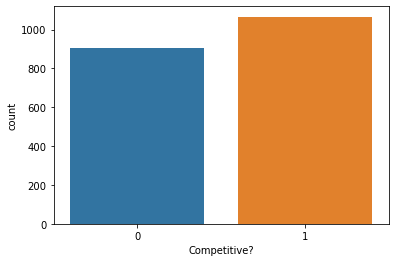

In [10]:
sns.countplot(x='Competitive?', data=df_with_dummies)
plt.xlabel('Competitive?')

In [11]:
X = df_with_dummies.drop(columns=['Competitive?', 'ClosePrice'])
y = df_with_dummies['Competitive?']

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [12]:
# Fit a classification tree - set the minimum number of records in a terminal node to 50
fullClassTree = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [13]:
# Accuracy level
fullClassTree.score(X_test, y_test)

0.7249683143219265

In [14]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.7250)

       Prediction
Actual   0   1
     0 261  92
     1 125 311


In [15]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.7219)

       Prediction
Actual   0   1
     0 402 151
     1 178 452


In [16]:
# Graph on http://webgraphviz.com/
export_graphviz(fullClassTree, 
                out_file='fullClassTree_withoutClosePrice.dot', 
                class_names=['0', '1'],
                filled=True,
                feature_names=X_train.columns)

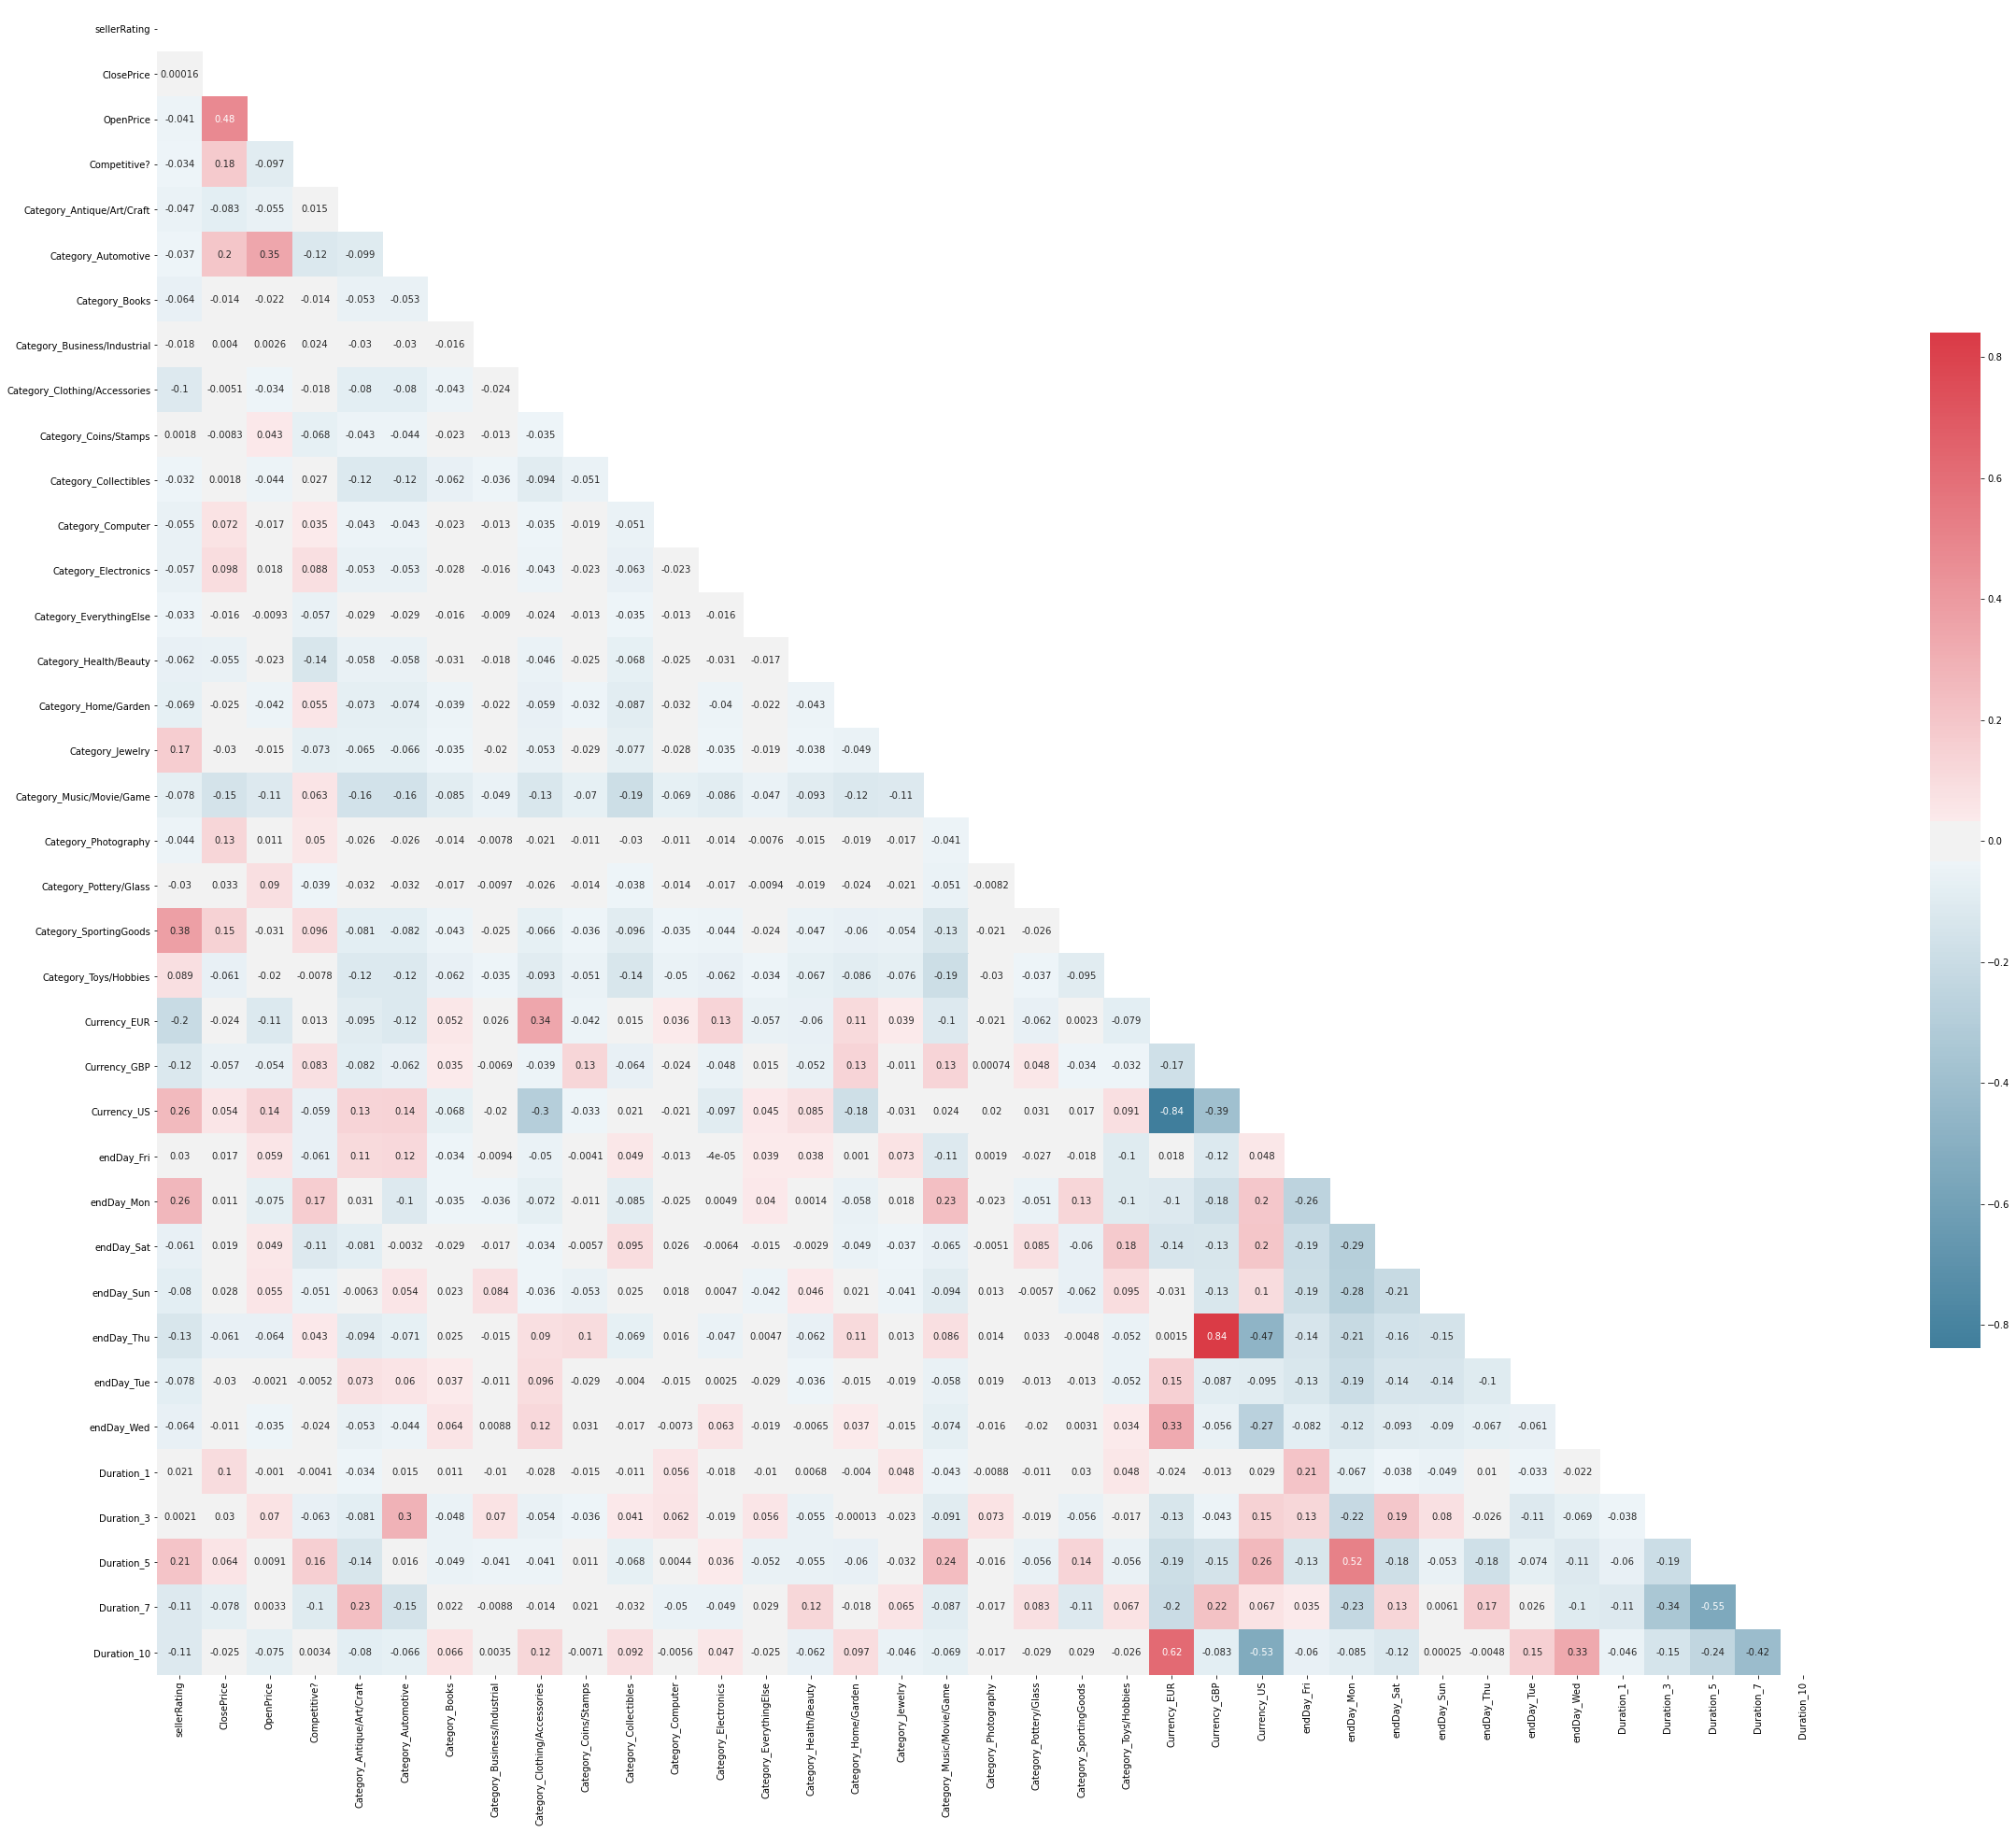

In [17]:
# Correlation matrix
corr = df_with_dummies.corr()

plt.figure(figsize=(40,40))
sns.heatmap(corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            cbar_kws={"shrink": .5},
            annot=True)

Feature 0 sellerRating with score:0.35644
Feature 1 OpenPrice with score:0.57618
Feature 2 Category_Antique/Art/Craft with score:0.0
Feature 3 Category_Automotive with score:0.0
Feature 4 Category_Books with score:0.0
Feature 5 Category_Business/Industrial with score:0.0
Feature 6 Category_Clothing/Accessories with score:0.0
Feature 7 Category_Coins/Stamps with score:0.0
Feature 8 Category_Collectibles with score:0.0
Feature 9 Category_Computer with score:0.0
Feature 10 Category_Electronics with score:0.0
Feature 11 Category_EverythingElse with score:0.0
Feature 12 Category_Health/Beauty with score:0.0
Feature 13 Category_Home/Garden with score:0.0
Feature 14 Category_Jewelry with score:0.0
Feature 15 Category_Music/Movie/Game with score:0.02398
Feature 16 Category_Photography with score:0.0
Feature 17 Category_Pottery/Glass with score:0.0
Feature 18 Category_SportingGoods with score:0.0
Feature 19 Category_Toys/Hobbies with score:0.02968
Feature 20 Currency_EUR with score:0.01371
Feat

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

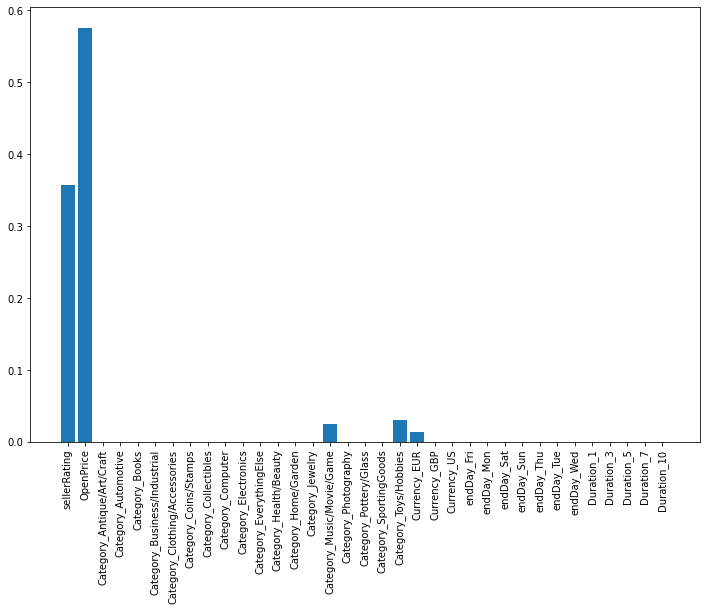

In [18]:
# Get importance
importance = fullClassTree.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print('Feature ' + str(i) + ' ' + X_train.columns[i] + " with score:" + str(round(importance[i],5)))

# Plot feature importance
plt.figure(figsize=(12,8))
plt.bar([X_train.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)

In [19]:
# Reduce the number of predictors
X_2 = df_with_dummies[['OpenPrice', 'sellerRating']]
y_2 = df_with_dummies['Competitive?']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.4, random_state=1)

In [20]:
# Fit another classification tree
subsetClassTree = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
subsetClassTree.fit(X_train_2, y_train_2)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [21]:
# Accuracy level
subsetClassTree.score(X_test_2, y_test_2)

0.714828897338403

In [22]:
classificationSummary(y_test_2, subsetClassTree.predict(X_test_2))

Confusion Matrix (Accuracy 0.7148)

       Prediction
Actual   0   1
     0 222 131
     1  94 342


In [23]:
classificationSummary(y_train_2, subsetClassTree.predict(X_train_2))

Confusion Matrix (Accuracy 0.7270)

       Prediction
Actual   0   1
     0 363 190
     1 133 497


In [24]:
# Graph on http://webgraphviz.com/
export_graphviz(subsetClassTree, 
                out_file='subsetClassTree.dot', 
                class_names=['0', '1'],
                filled=True,
                feature_names=X_train_2.columns)

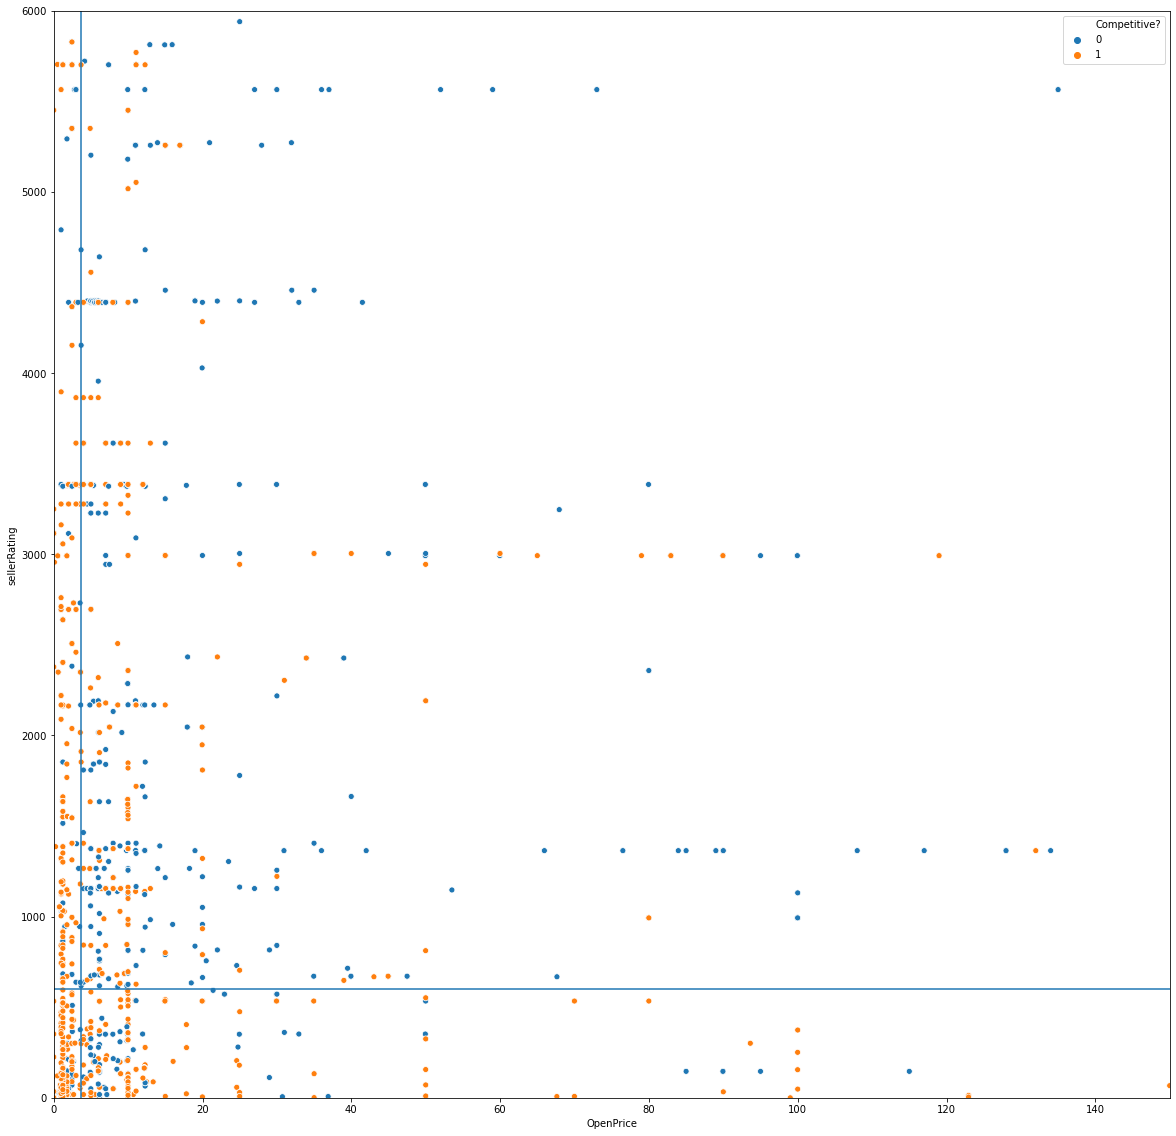

In [25]:
# Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors
plt.figure(figsize=(20,20))
sns.scatterplot(x='OpenPrice', y='sellerRating', hue='Competitive?', data=df_with_dummies)
plt.xlim(0,150)
plt.ylim(0,6000)

# Draw lines at the values that create split
plt.axvline(3.615)
plt.axhline(601.5)

In [26]:
# Linear regression - determine variable significance
rfmodel = RandomForestClassifier(random_state=1)
rfmodel.fit(X_train, y_train)

# Get importance
importance = rfmodel.feature_importances_

Feature 0 sellerRating with score:0.23637
Feature 1 OpenPrice with score:0.31534
Feature 2 Category_Antique/Art/Craft with score:0.01462
Feature 3 Category_Automotive with score:0.01639
Feature 4 Category_Books with score:0.01632
Feature 5 Category_Business/Industrial with score:0.00659
Feature 6 Category_Clothing/Accessories with score:0.01371
Feature 7 Category_Coins/Stamps with score:0.00891
Feature 8 Category_Collectibles with score:0.01963
Feature 9 Category_Computer with score:0.00959
Feature 10 Category_Electronics with score:0.00834
Feature 11 Category_EverythingElse with score:0.00382
Feature 12 Category_Health/Beauty with score:0.01707
Feature 13 Category_Home/Garden with score:0.01144
Feature 14 Category_Jewelry with score:0.01042
Feature 15 Category_Music/Movie/Game with score:0.02538
Feature 16 Category_Photography with score:0.00499
Feature 17 Category_Pottery/Glass with score:0.00429
Feature 18 Category_SportingGoods with score:0.01422
Feature 19 Category_Toys/Hobbies wi

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

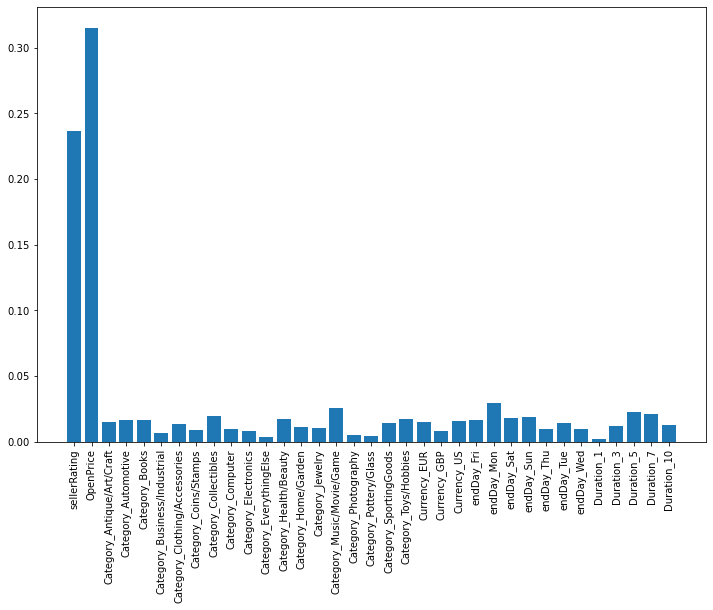

In [27]:
# Summarize feature importance
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print('Feature ' + str(i) + ' ' + X_train.columns[i] + " with score:" + str(round(importance[i],5)))

# Plot feature importance
plt.figure(figsize=(12,8))
plt.bar([X_train.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)